In [1]:
from fit_model import *

In [2]:
from time import time

In [3]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    # ES NECESARIO, para que asi pueda devolver la dimesión de 8
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model
    
def define_model_1_var(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    model.add(RepeatVector(tar_timesteps)) 
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

# Encoder-Decoder
def define_model_4(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    # Encoder
    model.add(GRU(n_units, input_shape=(src_timesteps,1), go_backwards=True ))
    model.add(RepeatVector(tar_timesteps))
    # Decoder
    model.add(GRU(n_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [9]:
folderImg_name = "img_caro/cm_model_v2_"
folderModels_name = "models_caro/cm_model_v2_"
folderHistories_name = "histories_caro/cm_history_v2_"

ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', \
                                       'dataset/english-spanish-train-10000.txt', \
                                       'dataset/english-spanish-test-10000.txt'
epochs= 100

In [6]:
def extract_histories(quantity, vector_namesHistory):
    for i in range(1,quantity+1):
        history = load_history(vector_namesHistory[i-1])
        history_models_trainLoss.append(history['loss'])
        history_models_testLoss.append(history['val_loss'])
    
def graph_historyModels(history,title, nameModels, save_image_filename):
    # define axis X , Create count of the number of epochs
    epoch_count = range(1,epochs +1)
        
    plt.plot(epoch_count, history[0], 'r-')
    plt.plot(epoch_count, history[1], 'b-')
    plt.plot(epoch_count, history[2], 'g-')
    plt.legend(nameModels)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.savefig(save_image_filename) 
    plt.show() 
    
    # print min values
    print(f"{nameModels[0]} = {round(min(history[0]),4) }" )
    print(f"{nameModels[1]} = {round(min(history[1]),4)}" )
    print(f"{nameModels[2]} = {round(min(history[2]),4)}" )

# Pruebas Modelo 1

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_7 (GRU)                 (None, 123)               46494     
                                                                 
 repeat_vector_7 (RepeatVect  (None, 8, 123)           0         
 or)                                                             
                                                                 
 time_distributed_7 (TimeDis  (None, 8, 4510)          559240    
 tributed)                                                       
                                                                 
Total params: 605,734
Trainable params: 605,734
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 3.03846, saving model to models_caro\cm_model_1_7.h5
125/125 - 71s - l

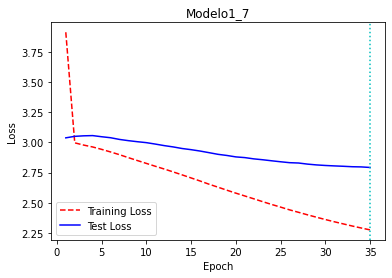

In [19]:
units = 123
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '1_1'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 256)               198912    
                                                                 
 repeat_vector_8 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 time_distributed_8 (TimeDis  (None, 8, 4510)          1159070   
 tributed)                                                       
                                                                 
Total params: 1,357,982
Trainable params: 1,357,982
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 3.02569, saving model to models_caro\cm_model_1_8.h5
250/250 - 18s

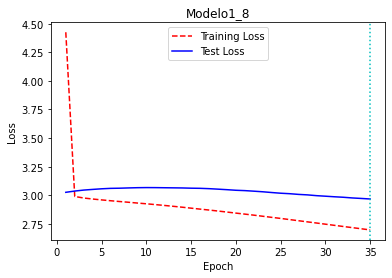

In [20]:
units = 256
learning_rate = 0.0001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_8'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 1024)              3154944   
                                                                 
 repeat_vector_9 (RepeatVect  (None, 8, 1024)          0         
 or)                                                             
                                                                 
 time_distributed_9 (TimeDis  (None, 8, 4510)          4622750   
 tributed)                                                       
                                                                 
Total params: 7,777,694
Trainable params: 7,777,694
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 2.97129, saving model to models_caro\cm_model_1_9.h5
125/125 - 43s

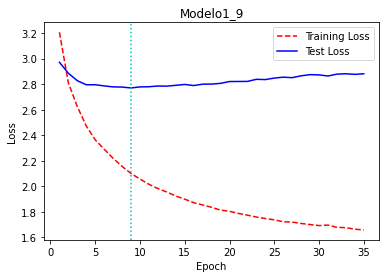

In [21]:
units = 1024
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '1_9'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

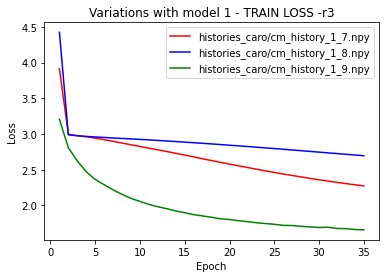

histories_caro/cm_history_1_7.npy = 2.2743
histories_caro/cm_history_1_8.npy = 2.6968
histories_caro/cm_history_1_9.npy = 1.6581


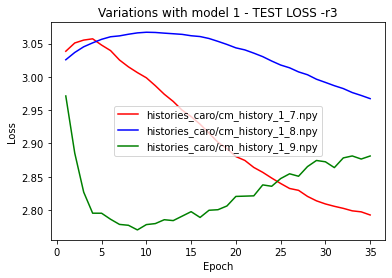

histories_caro/cm_history_1_7.npy = 2.7925
histories_caro/cm_history_1_8.npy = 2.9673
histories_caro/cm_history_1_9.npy = 2.7701


In [22]:
history_models_trainLoss = list()
history_models_testLoss = list()

flder = folderHistories_name
vector_namesHistory = [flder+'1_7.npy',flder+'1_8.npy',flder+'1_9.npy']
vector_names_legends = ['Model_1_7', 'Model_1_8','Model_1_9']

extract_histories(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"Variations with model 1 - TRAIN LOSS -r3", \
                             vector_namesHistory,  \
                             folderImg_name+"1_variations_trainLoss_r3")

graph_historyModels(history_models_testLoss,"Variations with model 1 - TEST LOSS -r3",  \
                             vector_namesHistory,  \
                             folderImg_name+"1_variations_testLoss_r3")

# Pruebas Modelo 1 var

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 256)               198912    
                                                                 
 repeat_vector_3 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 time_distributed_6 (TimeDis  (None, 8, 256)           65792     
 tributed)                                                       
                                                                 
 dropout_3 (Dropout)         (None, 8, 256)            0         
                                                                 
 time_distributed_7 (TimeDis  (None, 8, 4510)          1159070   
 tributed)                                                       


250/250 - 46s - loss: 2.4645 - acc: 0.6408 - val_loss: 2.8558 - val_acc: 0.6417 - 46s/epoch - 184ms/step
Epoch 35/100

Epoch 35: val_loss did not improve from 2.84898
250/250 - 48s - loss: 2.4557 - acc: 0.6405 - val_loss: 2.8532 - val_acc: 0.6417 - 48s/epoch - 190ms/step
Epoch 36/100

Epoch 36: val_loss did not improve from 2.84898
250/250 - 48s - loss: 2.4489 - acc: 0.6407 - val_loss: 2.8511 - val_acc: 0.6417 - 48s/epoch - 193ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 2.84898
250/250 - 48s - loss: 2.4355 - acc: 0.6407 - val_loss: 2.8510 - val_acc: 0.6417 - 48s/epoch - 192ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 2.84898
250/250 - 48s - loss: 2.4297 - acc: 0.6406 - val_loss: 2.8569 - val_acc: 0.6417 - 48s/epoch - 190ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 2.84898
250/250 - 46s - loss: 2.4183 - acc: 0.6407 - val_loss: 2.8609 - val_acc: 0.6417 - 46s/epoch - 185ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 2.8489

Epoch 84/100

Epoch 84: val_loss did not improve from 2.84898
250/250 - 44s - loss: 2.2499 - acc: 0.6404 - val_loss: 2.9333 - val_acc: 0.6417 - 44s/epoch - 174ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 2.84898
250/250 - 45s - loss: 2.2420 - acc: 0.6402 - val_loss: 2.9343 - val_acc: 0.6417 - 45s/epoch - 178ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 2.84898
250/250 - 43s - loss: 2.2467 - acc: 0.6405 - val_loss: 2.9404 - val_acc: 0.6417 - 43s/epoch - 171ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 2.84898
250/250 - 41s - loss: 2.2404 - acc: 0.6400 - val_loss: 2.9386 - val_acc: 0.6417 - 41s/epoch - 164ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 2.84898
250/250 - 40s - loss: 2.2393 - acc: 0.6404 - val_loss: 2.9321 - val_acc: 0.6417 - 40s/epoch - 161ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 2.84898
250/250 - 40s - loss: 2.2418 - acc: 0.6401 - val_loss: 2.9395 - val_acc: 0.6417 - 40s/epoch - 160ms/ste

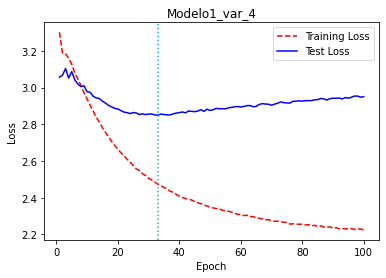

In [11]:
units = 256
learning_rate = 0.003
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_var_4'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 256)               198912    
                                                                 
 repeat_vector_4 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 time_distributed_8 (TimeDis  (None, 8, 256)           65792     
 tributed)                                                       
                                                                 
 dropout_4 (Dropout)         (None, 8, 256)            0         
                                                                 
 time_distributed_9 (TimeDis  (None, 8, 4510)          1159070   
 tributed)                                                       


Epoch 35/100

Epoch 35: val_loss did not improve from 2.80917
250/250 - 41s - loss: 2.2499 - acc: 0.6409 - val_loss: 2.8207 - val_acc: 0.6417 - 41s/epoch - 163ms/step
Epoch 36/100

Epoch 36: val_loss did not improve from 2.80917
250/250 - 39s - loss: 2.2408 - acc: 0.6409 - val_loss: 2.8216 - val_acc: 0.6417 - 39s/epoch - 156ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 2.80917
250/250 - 38s - loss: 2.2251 - acc: 0.6409 - val_loss: 2.8248 - val_acc: 0.6417 - 38s/epoch - 154ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 2.80917
250/250 - 39s - loss: 2.2106 - acc: 0.6408 - val_loss: 2.8253 - val_acc: 0.6417 - 39s/epoch - 158ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 2.80917
250/250 - 42s - loss: 2.2021 - acc: 0.6409 - val_loss: 2.8280 - val_acc: 0.6417 - 42s/epoch - 166ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 2.80917
250/250 - 43s - loss: 2.1902 - acc: 0.6409 - val_loss: 2.8300 - val_acc: 0.6417 - 43s/epoch - 170ms/ste


Epoch 84: val_loss did not improve from 2.80917
250/250 - 40s - loss: 1.9049 - acc: 0.6397 - val_loss: 2.9497 - val_acc: 0.6417 - 40s/epoch - 160ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 2.80917
250/250 - 39s - loss: 1.9009 - acc: 0.6396 - val_loss: 2.9488 - val_acc: 0.6417 - 39s/epoch - 158ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 2.80917
250/250 - 39s - loss: 1.8998 - acc: 0.6396 - val_loss: 2.9442 - val_acc: 0.6417 - 39s/epoch - 155ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 2.80917
250/250 - 42s - loss: 1.8988 - acc: 0.6396 - val_loss: 2.9470 - val_acc: 0.6417 - 42s/epoch - 169ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 2.80917
250/250 - 41s - loss: 1.8909 - acc: 0.6397 - val_loss: 2.9512 - val_acc: 0.6417 - 41s/epoch - 164ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 2.80917
250/250 - 39s - loss: 1.8890 - acc: 0.6398 - val_loss: 2.9532 - val_acc: 0.6417 - 39s/epoch - 157ms/step
Epoch 90/10

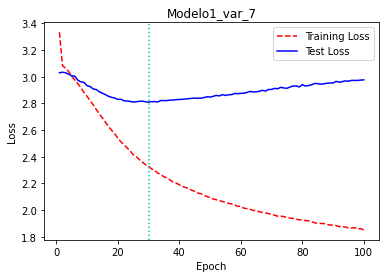

In [12]:
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_var_7'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 512)               791040    
                                                                 
 repeat_vector_5 (RepeatVect  (None, 8, 512)           0         
 or)                                                             
                                                                 
 time_distributed_10 (TimeDi  (None, 8, 512)           262656    
 stributed)                                                      
                                                                 
 dropout_5 (Dropout)         (None, 8, 512)            0         
                                                                 
 time_distributed_11 (TimeDi  (None, 8, 4510)          2313630   
 stributed)                                                      


Epoch 36/100

Epoch 36: val_loss did not improve from 2.81146
250/250 - 94s - loss: 2.0537 - acc: 0.6408 - val_loss: 2.8325 - val_acc: 0.6417 - 94s/epoch - 377ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 2.81146
250/250 - 111s - loss: 2.0409 - acc: 0.6404 - val_loss: 2.8435 - val_acc: 0.6417 - 111s/epoch - 443ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 2.81146
250/250 - 89s - loss: 2.0310 - acc: 0.6404 - val_loss: 2.8439 - val_acc: 0.6417 - 89s/epoch - 356ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 2.81146
250/250 - 90s - loss: 2.0192 - acc: 0.6405 - val_loss: 2.8458 - val_acc: 0.6417 - 90s/epoch - 361ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 2.81146
250/250 - 89s - loss: 2.0051 - acc: 0.6406 - val_loss: 2.8457 - val_acc: 0.6417 - 89s/epoch - 355ms/step
Epoch 41/100

Epoch 41: val_loss did not improve from 2.81146
250/250 - 35s - loss: 1.9993 - acc: 0.6404 - val_loss: 2.8548 - val_acc: 0.6417 - 35s/epoch - 142ms/s


Epoch 85: val_loss did not improve from 2.81146
250/250 - 36s - loss: 1.7428 - acc: 0.6389 - val_loss: 2.9861 - val_acc: 0.6417 - 36s/epoch - 144ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 2.81146
250/250 - 32s - loss: 1.7365 - acc: 0.6389 - val_loss: 2.9922 - val_acc: 0.6417 - 32s/epoch - 127ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 2.81146
250/250 - 31s - loss: 1.7371 - acc: 0.6390 - val_loss: 2.9970 - val_acc: 0.6417 - 31s/epoch - 125ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 2.81146
250/250 - 32s - loss: 1.7313 - acc: 0.6390 - val_loss: 3.0008 - val_acc: 0.6417 - 32s/epoch - 127ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 2.81146
250/250 - 32s - loss: 1.7271 - acc: 0.6389 - val_loss: 3.0068 - val_acc: 0.6417 - 32s/epoch - 127ms/step
Epoch 90/100

Epoch 90: val_loss did not improve from 2.81146
250/250 - 30s - loss: 1.7248 - acc: 0.6391 - val_loss: 3.0071 - val_acc: 0.6417 - 30s/epoch - 121ms/step
Epoch 91/10

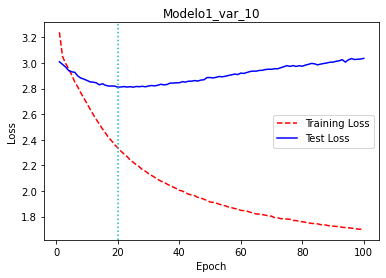

In [13]:
units = 512
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_var_10'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

In [14]:
def extract_histories_2(quantity, vector_namesHistory):
    for i in range(1,quantity+1):
        history = load_history(vector_namesHistory[i-1])
        history_models_trainLoss.append(history['val_acc'])
        history_models_testLoss.append(history['val_loss'])

In [ ]:
folderImg_name = "img_caro/cm_model_v2_"
folderModels_name = "models_caro/cm_model_v2_"
folderHistories_name = "histories_caro/cm_history_v2_"

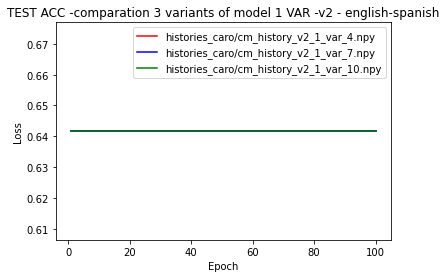

histories_caro/cm_history_v2_1_var_4.npy = 0.6417
histories_caro/cm_history_v2_1_var_7.npy = 0.6417
histories_caro/cm_history_v2_1_var_10.npy = 0.6417


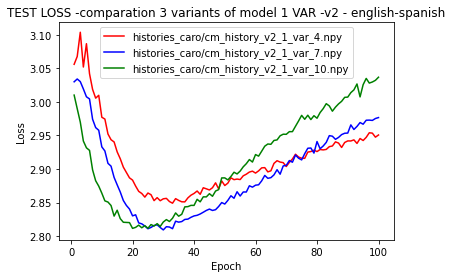

histories_caro/cm_history_v2_1_var_4.npy = 2.849
histories_caro/cm_history_v2_1_var_7.npy = 2.8092
histories_caro/cm_history_v2_1_var_10.npy = 2.8115


In [18]:
# [flder+'1_var_1.npy',flder+'1_var_4.npy',flder+'1_var_.np
                   
                   
                   
    # Las 3 mejores modelos de cada uno 
history_models_trainLoss = list()
history_models_testLoss = list()

vec_ids = ["1_var_4",'1_var_7','1_var_10']
# aqui me equivoque de nombreeeeee
number_round = "comparation 3 variants of model 1 VAR -v2 - english-spanish"
flder = "histories_caro/cm_history_v2_"
vector_namesHistory = [flder+vec_ids[0]+'.npy',flder+vec_ids[1]+'.npy',flder+vec_ids[2]+'.npy'] 

vector_names_legends = ['Model_'+vec_ids[0],'Model_'+vec_ids[1],'Model_'+vec_ids[2]]

extract_histories_2(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"TEST ACC -"+number_round, \
                             vector_namesHistory,  \
                             folderImg_name+"trainLoss_"+number_round)

graph_historyModels(history_models_testLoss,"TEST LOSS -"+number_round,  \
                             vector_namesHistory,  \
                             folderImg_name+"testLoss_"+number_round)

# Pruebas de Modelo 4

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 128)               50304     
                                                                 
 repeat_vector_6 (RepeatVect  (None, 8, 128)           0         
 or)                                                             
                                                                 
 gru_7 (GRU)                 (None, 128)               99072     
                                                                 
 repeat_vector_7 (RepeatVect  (None, 8, 128)           0         
 or)                                                             
                                                                 
 time_distributed_12 (TimeDi  (None, 8, 128)           16512     
 stributed)                                                      


Epoch 35/100

Epoch 35: val_loss improved from 2.94700 to 2.94196, saving model to models_caro\cm_model_v2_4_6.h5
63/63 - 15s - loss: 2.7110 - acc: 0.6411 - val_loss: 2.9420 - val_acc: 0.6417 - 15s/epoch - 232ms/step
Epoch 36/100

Epoch 36: val_loss did not improve from 2.94196
63/63 - 15s - loss: 2.6984 - acc: 0.6411 - val_loss: 2.9446 - val_acc: 0.6417 - 15s/epoch - 232ms/step
Epoch 37/100

Epoch 37: val_loss improved from 2.94196 to 2.94190, saving model to models_caro\cm_model_v2_4_6.h5
63/63 - 14s - loss: 2.6951 - acc: 0.6411 - val_loss: 2.9419 - val_acc: 0.6417 - 14s/epoch - 222ms/step
Epoch 38/100

Epoch 38: val_loss improved from 2.94190 to 2.93832, saving model to models_caro\cm_model_v2_4_6.h5
63/63 - 15s - loss: 2.6849 - acc: 0.6410 - val_loss: 2.9383 - val_acc: 0.6417 - 15s/epoch - 238ms/step
Epoch 39/100

Epoch 39: val_loss improved from 2.93832 to 2.93789, saving model to models_caro\cm_model_v2_4_6.h5
63/63 - 15s - loss: 2.6735 - acc: 0.6411 - val_loss: 2.9379 - val_acc:

Epoch 81/100

Epoch 81: val_loss did not improve from 2.91732
63/63 - 14s - loss: 2.5746 - acc: 0.6410 - val_loss: 2.9323 - val_acc: 0.6417 - 14s/epoch - 214ms/step
Epoch 82/100

Epoch 82: val_loss did not improve from 2.91732
63/63 - 14s - loss: 2.5692 - acc: 0.6409 - val_loss: 2.9273 - val_acc: 0.6417 - 14s/epoch - 223ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 2.91732
63/63 - 14s - loss: 2.5695 - acc: 0.6409 - val_loss: 2.9256 - val_acc: 0.6417 - 14s/epoch - 223ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 2.91732
63/63 - 14s - loss: 2.5647 - acc: 0.6410 - val_loss: 2.9349 - val_acc: 0.6417 - 14s/epoch - 222ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 2.91732
63/63 - 14s - loss: 2.5685 - acc: 0.6410 - val_loss: 2.9336 - val_acc: 0.6417 - 14s/epoch - 216ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 2.91732
63/63 - 14s - loss: 2.5662 - acc: 0.6410 - val_loss: 2.9279 - val_acc: 0.6417 - 14s/epoch - 227ms/step
Epoch 87/1

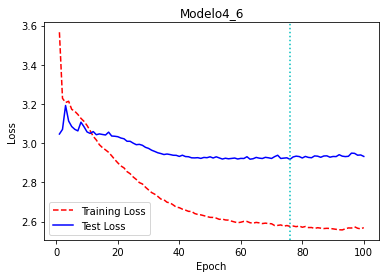

In [19]:
units = 128
learning_rate = 0.01
loss_func='sparse_categorical_crossentropy'
batch_size= 128
id_variation = '4_6'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 256)               198912    
                                                                 
 repeat_vector_8 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 gru_9 (GRU)                 (None, 256)               394752    
                                                                 
 repeat_vector_9 (RepeatVect  (None, 8, 256)           0         
 or)                                                             
                                                                 
 time_distributed_14 (TimeDi  (None, 8, 256)           65792     
 stributed)                                                      


250/250 - 24s - loss: 2.3854 - acc: 0.6410 - val_loss: 2.8247 - val_acc: 0.6417 - 24s/epoch - 98ms/step
Epoch 34/100

Epoch 34: val_loss did not improve from 2.82420
250/250 - 23s - loss: 2.3723 - acc: 0.6410 - val_loss: 2.8249 - val_acc: 0.6417 - 23s/epoch - 91ms/step
Epoch 35/100

Epoch 35: val_loss improved from 2.82420 to 2.82080, saving model to models_caro\cm_model_v2_4_9.h5
250/250 - 23s - loss: 2.3626 - acc: 0.6410 - val_loss: 2.8208 - val_acc: 0.6417 - 23s/epoch - 92ms/step
Epoch 36/100

Epoch 36: val_loss improved from 2.82080 to 2.81907, saving model to models_caro\cm_model_v2_4_9.h5
250/250 - 25s - loss: 2.3459 - acc: 0.6409 - val_loss: 2.8191 - val_acc: 0.6417 - 25s/epoch - 102ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 2.81907
250/250 - 26s - loss: 2.3346 - acc: 0.6410 - val_loss: 2.8314 - val_acc: 0.6417 - 26s/epoch - 103ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 2.81907
250/250 - 26s - loss: 2.3226 - acc: 0.6409 - val_loss: 2.8301 - 

Epoch 82/100

Epoch 82: val_loss did not improve from 2.81907
250/250 - 24s - loss: 2.0473 - acc: 0.6403 - val_loss: 2.9070 - val_acc: 0.6417 - 24s/epoch - 98ms/step
Epoch 83/100

Epoch 83: val_loss did not improve from 2.81907
250/250 - 25s - loss: 2.0455 - acc: 0.6403 - val_loss: 2.9086 - val_acc: 0.6417 - 25s/epoch - 98ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 2.81907
250/250 - 25s - loss: 2.0437 - acc: 0.6402 - val_loss: 2.9172 - val_acc: 0.6417 - 25s/epoch - 99ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 2.81907
250/250 - 25s - loss: 2.0412 - acc: 0.6403 - val_loss: 2.9153 - val_acc: 0.6417 - 25s/epoch - 99ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 2.81907
250/250 - 25s - loss: 2.0313 - acc: 0.6399 - val_loss: 2.9162 - val_acc: 0.6417 - 25s/epoch - 99ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 2.81907
250/250 - 25s - loss: 2.0345 - acc: 0.6401 - val_loss: 2.9100 - val_acc: 0.6417 - 25s/epoch - 99ms/step
Epoc

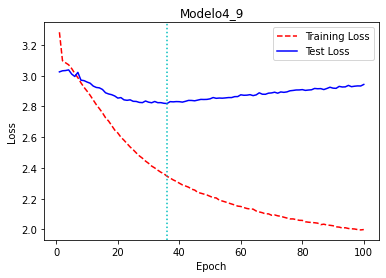

In [20]:
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '4_9'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 256)               198912    
                                                                 
 repeat_vector_10 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 gru_11 (GRU)                (None, 256)               394752    
                                                                 
 repeat_vector_11 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 time_distributed_16 (TimeDi  (None, 8, 256)           65792     
 stributed)                                                      


Epoch 34/100

Epoch 34: val_loss did not improve from 2.81963
250/250 - 24s - loss: 2.3603 - acc: 0.6410 - val_loss: 2.8279 - val_acc: 0.6417 - 24s/epoch - 96ms/step
Epoch 35/100

Epoch 35: val_loss did not improve from 2.81963
250/250 - 24s - loss: 2.3481 - acc: 0.6409 - val_loss: 2.8201 - val_acc: 0.6417 - 24s/epoch - 95ms/step
Epoch 36/100

Epoch 36: val_loss did not improve from 2.81963
250/250 - 25s - loss: 2.3394 - acc: 0.6410 - val_loss: 2.8233 - val_acc: 0.6417 - 25s/epoch - 101ms/step
Epoch 37/100

Epoch 37: val_loss did not improve from 2.81963
250/250 - 25s - loss: 2.3248 - acc: 0.6410 - val_loss: 2.8249 - val_acc: 0.6417 - 25s/epoch - 99ms/step
Epoch 38/100

Epoch 38: val_loss did not improve from 2.81963
250/250 - 25s - loss: 2.3126 - acc: 0.6410 - val_loss: 2.8303 - val_acc: 0.6417 - 25s/epoch - 100ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 2.81963
250/250 - 25s - loss: 2.3006 - acc: 0.6410 - val_loss: 2.8306 - val_acc: 0.6417 - 25s/epoch - 101ms/step
E

250/250 - 26s - loss: 2.0222 - acc: 0.6400 - val_loss: 2.9056 - val_acc: 0.6417 - 26s/epoch - 103ms/step
Epoch 84/100

Epoch 84: val_loss did not improve from 2.81963
250/250 - 26s - loss: 2.0161 - acc: 0.6400 - val_loss: 2.9105 - val_acc: 0.6417 - 26s/epoch - 103ms/step
Epoch 85/100

Epoch 85: val_loss did not improve from 2.81963
250/250 - 25s - loss: 2.0098 - acc: 0.6400 - val_loss: 2.9065 - val_acc: 0.6417 - 25s/epoch - 102ms/step
Epoch 86/100

Epoch 86: val_loss did not improve from 2.81963
250/250 - 25s - loss: 2.0094 - acc: 0.6398 - val_loss: 2.9119 - val_acc: 0.6417 - 25s/epoch - 101ms/step
Epoch 87/100

Epoch 87: val_loss did not improve from 2.81963
250/250 - 25s - loss: 2.0042 - acc: 0.6397 - val_loss: 2.9148 - val_acc: 0.6417 - 25s/epoch - 101ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 2.81963
250/250 - 26s - loss: 2.0068 - acc: 0.6400 - val_loss: 2.9183 - val_acc: 0.6417 - 26s/epoch - 103ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 2.8196

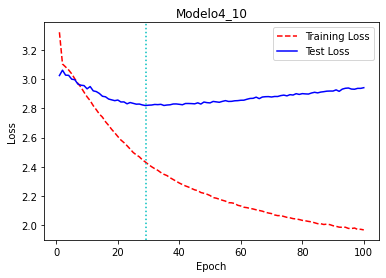

In [21]:
units = 256
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '4_10'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

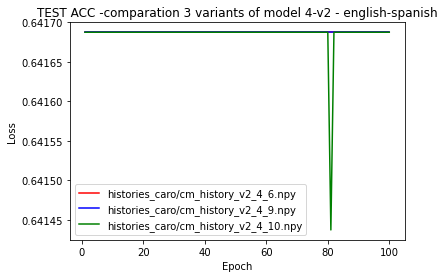

histories_caro/cm_history_v2_4_6.npy = 0.6417
histories_caro/cm_history_v2_4_9.npy = 0.6417
histories_caro/cm_history_v2_4_10.npy = 0.6414


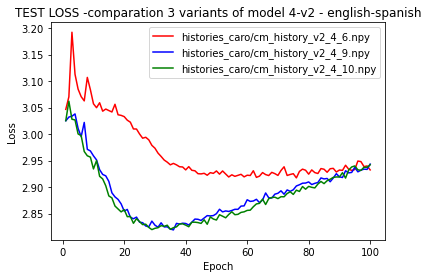

histories_caro/cm_history_v2_4_6.npy = 2.9173
histories_caro/cm_history_v2_4_9.npy = 2.8191
histories_caro/cm_history_v2_4_10.npy = 2.8196


In [22]:
    # Las 3 mejores modelos de cada uno 
history_models_trainLoss = list()
history_models_testLoss = list()

vec_ids = ["4_6",'4_9','4_10']
number_round = "comparation 3 variants of model 4-v2 - english-spanish"
vector_namesHistory = [flder+vec_ids[0]+'.npy',flder+vec_ids[1]+'.npy',flder+vec_ids[2]+'.npy'] 

vector_names_legends = ['Model_'+vec_ids[0],'Model_'+vec_ids[1],'Model_'+vec_ids[2]]

extract_histories_2(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"TEST ACC -"+number_round, \
                             vector_namesHistory,  \
                             folderImg_name+"trainLoss_"+number_round)

graph_historyModels(history_models_testLoss,"TEST LOSS -"+number_round,  \
                             vector_namesHistory,  \
                             folderImg_name+"testLoss_"+number_round)
